### **Integrating Text Recognition with the Model**

 # **Detecting Text in Image**

Installing Libraries

In [3]:
!pip install -q keras-ocr
!sudo apt install tesseract-ocr
!pip install pytesseract

     |████████████████████████████████| 42 kB 539 kB/s 
     |████████████████████████████████| 930 kB 9.7 MB/s 
     |████████████████████████████████| 603 kB 49.1 MB/s 
     |████████████████████████████████| 9.5 MB 50.1 MB/s 
     |████████████████████████████████| 50 kB 5.3 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 

Mencari path atau directory dari Tesseract.
> Copy path untuk pytesseract.pytesseract.tesseract_cmd




In [4]:
!which tesseract

/usr/bin/tesseract


Import Libraries

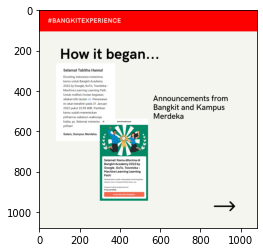

In [5]:
import pytesseract
import cv2
import matplotlib.pylab as plt

pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'


img = cv2.imread('/2(2).png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

Membaca text dalam image

In [6]:
img_to_char = pytesseract.image_to_string(img)
print(img_to_char)

#BANGKITEXPERIENCE

 

How it began...

Selamat Tabitha Hanna!

Dicoding Indonesia menerima
kamu untuk Bangkit Academy
2022 by Google, GoTo, Traveloka -
Machine Learning Learning Path.
Untuk melihat rincian kegiatan,
silakan klik tautan ini. Penawaran
ini akan berakhir pada 31 Januari
2022 pukul 23:59 WIB. Pastikan
kamu sudah menentukan
pilihanmu sebelum waktunya
habis, ya. Selamat menentu
pilihan!

‘Salam, Kampus Merdeka

Selamat! Kamu diterima di

Bangkit Academy 2022 by
Google, GoTo, Traveloka -
Machine Learning Learning
Path!

Janu 2022

 

Announcements from
Bangkit and Kampus
Merdeka



**Prediction**

In [18]:
import csv
import random
import pickle
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from scipy.stats import linregress
from tensorflow.keras.preprocessing.text import Tokenizer

In [19]:
NUM_WORDS = 1000
EMBEDDING_DIM = 100
MAXLEN = 16
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8
TRUNCATING = 'post'
MAX_EXAMPLES = 160000

In [20]:
def fit_tokenizer(train_sentences, num_words, oov_token):
  tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token=OOV_TOKEN)
  tokenizer.fit_on_texts(train_sentences)
  return tokenizer

In [21]:
def seq_and_pad(sentences, tokenizer, padding, maxlen):
  sequences = tokenizer.texts_to_sequences(sentences)
  padded_sequences = pad_sequences(sequences, maxlen=MAXLEN, padding=PADDING)
  
  return padded_sequences

In [25]:
text = img_to_char
text = text.lower()
text1 = text.split()

In [26]:
tokenizer = fit_tokenizer(text, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 33 words

<OOV> token included in vocabulary


In [32]:
new_model = tf.keras.models.load_model("/model.h5")
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 100)           1000000   
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 dense_1 (Dense)             (None, 24)                48        
                                                                 
Total params: 1,000,149
Trainable params: 1,000,149
Non-trainable params: 0
_________________________________________________________________


In [34]:
for x in range(len(text1)) :
  word_token = seq_and_pad(text1[x], tokenizer, PADDING, MAXLEN)
  predict = new_model.predict(word_token)

In [35]:
print(predict)

[[0.5189266  0.1448782  0.0117396  0.01359014 0.01634258 0.01424202
  0.0168163  0.01855919 0.01222501 0.01915676 0.01869625 0.01693207
  0.01296028 0.0163317  0.02515021 0.01640147 0.01201593 0.01310757
  0.0148938  0.0121894  0.01343831 0.01336242 0.01497083 0.01307331]
 [0.5189292  0.14487822 0.01173948 0.01359002 0.01634247 0.01424191
  0.01681619 0.01855908 0.0122249  0.01915665 0.01869614 0.01693196
  0.01296016 0.01633158 0.02515012 0.01640136 0.01201582 0.01310746
  0.01489368 0.01218929 0.01343819 0.01336231 0.01497071 0.01307319]
 [0.5189324  0.14487825 0.01173933 0.01358987 0.01634232 0.01424175
  0.01681604 0.01855893 0.01222474 0.0191565  0.01869599 0.0169318
  0.01296001 0.01633143 0.02514999 0.0164012  0.01201566 0.0131073
  0.01489353 0.01218913 0.01343804 0.01336215 0.01497056 0.01307304]
 [0.518923   0.14487813 0.01173977 0.01359031 0.01634276 0.0142422
  0.01681648 0.01855936 0.01222518 0.01915693 0.01869642 0.01693224
  0.01296045 0.01633187 0.02515034 0.01640165 0.